# FIR Filter testing

In [1]:
import pyda.dsp.spectral
from pyda.dsp.filter import FIR
from pyda import TSData
from pyda.dsp.spectral import psd, logpsd

import scipy

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

## Generate lowpass and highpass filters

In [2]:


lp = FIR.lowpass(fc=1, gain=1, fs=10, order=32, win='blackmanharris', iunits='V', ounits='m')
hp = FIR.highpass(fc=1, gain=1, fs=10, order=32, win='blackmanharris', iunits='V', ounits='m')

print(lp)
print(hp)


-------- FIR ---------
   name: lowpass
      a: [-7.02388355e-07  5.12385444e-21  4.09280574e-05  2.12048266e-04
  5.48944955e-04  7.63869347e-04 -6.46093809e-19 -2.90222095e-03
 -8.23840319e-03 -1.37242705e-02] ...
     fs: 10
     gd: 16.0
  ntaps: 33
 iunits: [V]
 ounits: [m]

-----------------------------
-------- FIR ---------
   name: highpass
      a: [ 7.01617055e-07  6.99663607e-20 -4.08831139e-05 -2.11815413e-04
 -5.48342153e-04 -7.63030534e-04 -2.58153731e-18  2.89903399e-03
  8.22935651e-03  1.37091998e-02] ...
     fs: 10
     gd: 16.0
  ntaps: 33
 iunits: [V]
 ounits: [m]

-----------------------------


## Compute response

In [3]:

r_lp = lp.resp(f1=1e-1, f2=5, nf=1000)
r_hp = hp.resp(f1=1e-1, f2=5, nf=1000)

print(r_lp)
print(r_hp)


-------- FSData ---------
  name: resp(lowpass)
  uuid: 761d9078-7e62-4c1e-84c0-009c23375cd2
     x: Frequency=(1000,)[Hz]
     y: Amplitude=(1000,)[m][V^(-1)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(1,)[m][V^(-1)]

-----------------------------
-------- FSData ---------
  name: resp(highpass)
  uuid: 7e867384-e373-4fdb-9fe6-cbcfb76cdf33
     x: Frequency=(1000,)[Hz]
     y: Amplitude=(1000,)[m][V^(-1)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(1,)[m][V^(-1)]

-----------------------------


## Plot Responses

plotting complex data...


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{m}}}{\\,{\\mathrm{V}}} \\right]$'>,
  <AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Phase (º)'>],
 []]

<Figure size 1080x720 with 0 Axes>

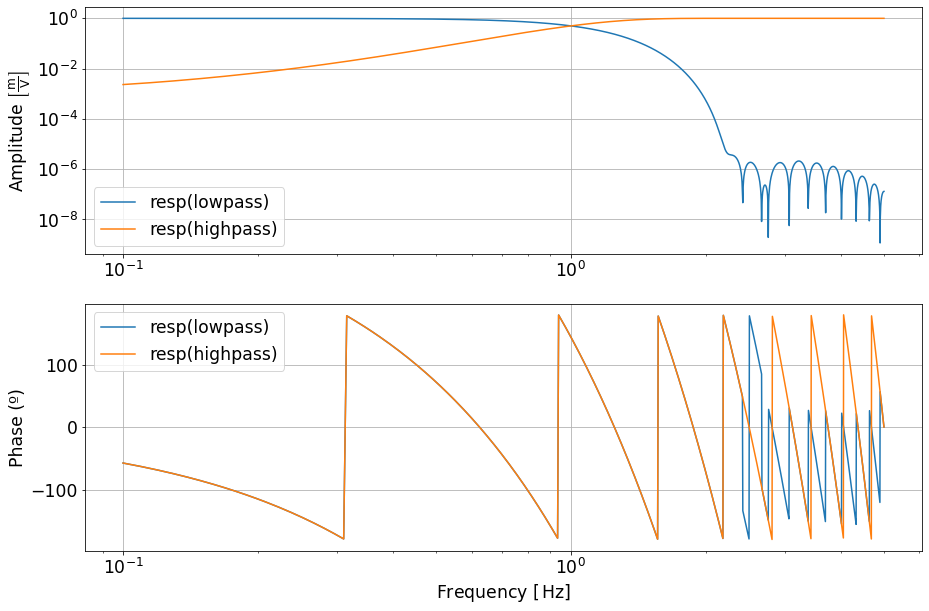

In [4]:

r_lp.loglog(r_hp)


## Filter Data

In [5]:

ts = TSData.randn(nsecs=1000, fs=10, name='ts', yunits='N')

lts = lp.filter(ts)
hts = hp.filter(ts)

print(lts)

-------- TSData ---------
  name: lowpass(ts)
  uuid: 21e6dad2-0ecb-495d-ae01-079f262576e1
    fs: 10.0
 xaxis: Time=(10000,)[s]
 yaxis: Amplitude=(10000,)[N][m][V^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[N][m][V^(-1)]

-----------------------------


## Compute Spectra

In [6]:
S_ts  = psd(ts=ts)
S_lts = psd(ts=lts)
S_hts = psd(ts=hts)


Processing PSD with segments of length 10000 and overlap of 5000.0 samples (50%)
Processing PSD with segments of length 10000 and overlap of 5000.0 samples (50%)
Processing PSD with segments of length 10000 and overlap of 5000.0 samples (50%)


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{N}}^{2}}{\\,{\\mathrm{Hz}}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

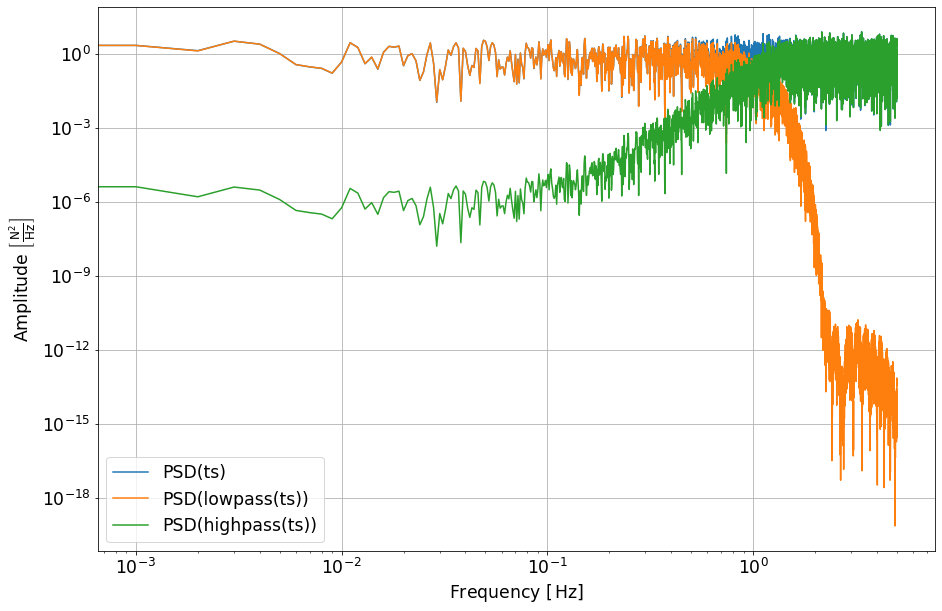

In [7]:

S_ts.loglog(S_lts, S_hts)


In [8]:
lS_ts  = logpsd(ts=ts)
lS_lts = logpsd(ts=lts)
lS_hts = logpsd(ts=hts)


* computing lpsd of ts ...
* computing lpsd of lowpass(ts) ...
* computing lpsd of highpass(ts) ...


/Users/hewitson/.conda/envs/pyda39/lib/python3.9/site-packages/lpsd/_helpers.py:461: RuntimeWarning: invalid value encountered in sqrt
  devxx[i] = np.sqrt(B2ns / fs ** 2 / S2 ** 2)
/Users/hewitson/.conda/envs/pyda39/lib/python3.9/site-packages/lpsd/_helpers.py:462: RuntimeWarning: invalid value encountered in sqrt
  dev[i] = np.sqrt(B2ns / S12 ** 2)


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{N}}^{2}}{\\,{\\mathrm{Hz}}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

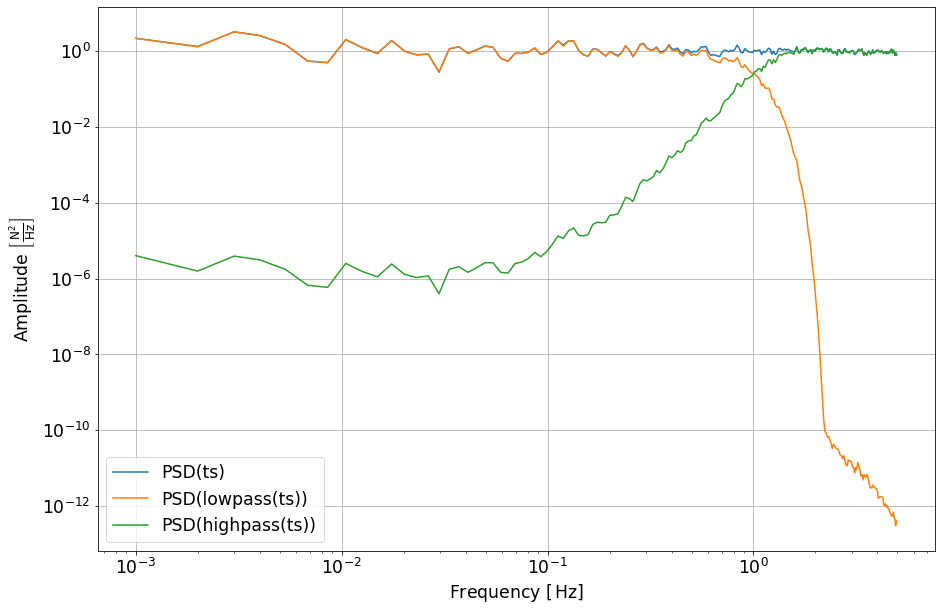

In [9]:
lS_ts.loglog(lS_lts, lS_hts)


## Generate bandpass and bandstop filters

In [10]:

bp = FIR.bandpass(gain = 2, fs = 10, fc=[0.01, 0.1], order=1024, iunits='V', ounits='m')
bs = FIR.bandstop(gain = 2, fs = 10, fc=[0.01, 0.1], order=1024, iunits='V', ounits='m')
print(bp)

-------- FIR ---------
   name: bandpass
      a: [5.66895577e-08 5.32783818e-08 5.04563982e-08 4.80055944e-08
 4.56907628e-08 4.32616575e-08 4.04552945e-08 3.69983848e-08
 3.26098900e-08 2.70036878e-08] ...
     fs: 10
     gd: 512.0
  ntaps: 1025
 iunits: [V]
 ounits: [m]

-----------------------------


## Plot response

plotting complex data...


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{m}}}{\\,{\\mathrm{V}}} \\right]$'>,
  <AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Phase (º)'>],
 []]

<Figure size 1080x720 with 0 Axes>

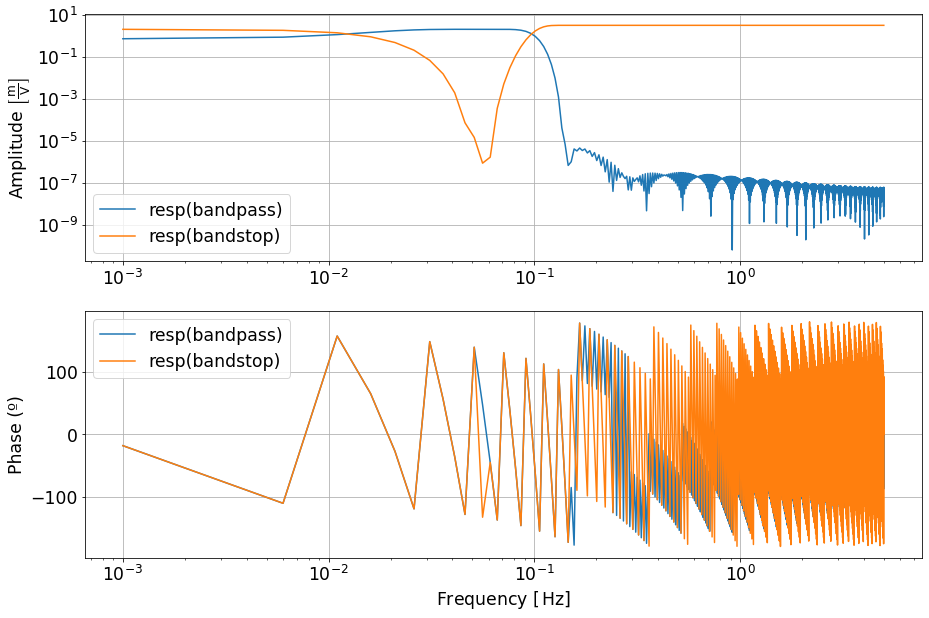

In [11]:


r_bp = bp.resp(f1=1e-3, f2=5, nf=1000)
r_bs = bs.resp(f1=1e-3, f2=5, nf=1000)
r_bp.loglog(r_bs)


## Filter data

In [12]:
ts = TSData.randn(nsecs=10000, fs=10, name='ts', yunits='N')

pts = bp.filter(ts)
sts = bs.filter(ts)

print(pts)


-------- TSData ---------
  name: bandpass(ts)
  uuid: d94cf039-e265-4a2c-a443-f242abf82cab
    fs: 10.0
 xaxis: Time=(100000,)[s]
 yaxis: Amplitude=(100000,)[N][m][V^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[N][m][V^(-1)]

-----------------------------


## Show spectra

* computing lpsd of ts ...
* computing lpsd of bandpass(ts) ...
* computing lpsd of bandstop(ts) ...


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{N}}^{2}}{\\,{\\mathrm{Hz}}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

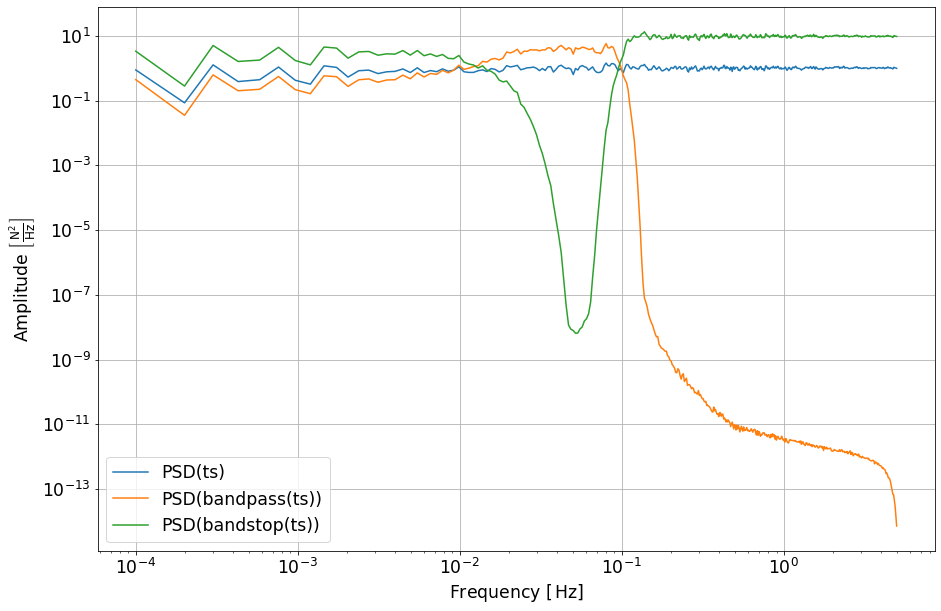

In [13]:
lS_ts = logpsd(ts=ts)
lS_pts = logpsd(ts=pts)
lS_sts = logpsd(ts=sts)

lS_ts.loglog(lS_pts, lS_sts)